#### Introduction
Here is a first exploratory analysis of the competition dataset.
On its website Instacart has a recommendation feature, suggesting the users some items that he/she may buy again. Our task is to predict which items will be reordered on the
next order.

The dataset consists of information about 3.4 million grocery orders, distributed across 6 csv files. 

In [2]:
# Load the libraries to be used
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)

#Load the data.
orders <- fread('C:/Users/Evander/Documents/R project/Instacart Market Basket Analysis/orders.csv')
products <- fread('C:/Users/Evander/Documents/R project/Instacart Market Basket Analysis/products.csv')
order_products <- fread('C:/Users/Evander/Documents/R project/Instacart Market Basket Analysis/order_products__train.csv')
order_products_prior <- fread('C:/Users/Evander/Documents/R project/Instacart Market Basket Analysis/order_products__prior.csv')
aisles <- fread('C:/Users/Evander/Documents/R project/Instacart Market Basket Analysis/aisles.csv')
departments <- fread('C:/Users/Evander/Documents/R project/Instacart Market Basket Analysis/departments.csv')




Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Read 3421083 rows and 7 (of 7) columns from 0.101 GB file in 00:00:05
Read 32434489 rows and 4 (of 4) columns from 0.538 GB file in 00:00:17




#### orders

Lets first have a look at these files:
This file gives a list of all orders we have in the dataset. 1 row per order. 
For example, we can see that user 1 has 11 orders, 1 of which is in the train set, and 10 of which are prior orders. The orders.csv doesn't tell us about which products were ordered. This is contained in the order_products.csv




In [5]:
kable(head(orders,12))
glimpse(orders)



| order_id| user_id|eval_set | order_number| order_dow| order_hour_of_day| days_since_prior_order|
|--------:|-------:|:--------|------------:|---------:|-----------------:|----------------------:|
|  2539329|       1|prior    |            1|         2|                 8|                     NA|
|  2398795|       1|prior    |            2|         3|                 7|                     15|
|   473747|       1|prior    |            3|         3|                12|                     21|
|  2254736|       1|prior    |            4|         4|                 7|                     29|
|   431534|       1|prior    |            5|         4|                15|                     28|
|  3367565|       1|prior    |            6|         2|                 7|                     19|
|   550135|       1|prior    |            7|         1|                 9|                     20|
|  3108588|       1|prior    |            8|         1|                14|                     14|
|  22952

Observations: 3,421,083
Variables: 7
$ order_id               <int> 2539329, 2398795, 473747, 2254736, 431534, 3...
$ user_id                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,...
$ eval_set               <chr> "prior", "prior", "prior", "prior", "prior",...
$ order_number           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, ...
$ order_dow              <int> 2, 3, 3, 4, 4, 2, 1, 1, 1, 4, 4, 2, 5, 1, 2,...
$ order_hour_of_day      <int> 8, 7, 12, 7, 15, 7, 9, 14, 16, 8, 8, 11, 10,...
$ days_since_prior_order <dbl> NA, 15, 21, 29, 28, 19, 20, 14, 0, 30, 14, N...


#### order_products_train

This file gives us information about which products (product_id) were ordered. It also contains information of the order (add_to_cart_order) in which the products were put into the cart and information of whether this product is a re-order(1) or not(0).

For example, we see below that order_id 1 had 8 products, 4 of which are reorders.

Still we don't know what these products are. This information is in the products.csv

In [6]:
kable(head(order_products,10))
glimpse(order_products)



| order_id| product_id| add_to_cart_order| reordered|
|--------:|----------:|-----------------:|---------:|
|        1|      49302|                 1|         1|
|        1|      11109|                 2|         1|
|        1|      10246|                 3|         0|
|        1|      49683|                 4|         0|
|        1|      43633|                 5|         1|
|        1|      13176|                 6|         0|
|        1|      47209|                 7|         0|
|        1|      22035|                 8|         1|
|       36|      39612|                 1|         0|
|       36|      19660|                 2|         1|

Observations: 1,384,617
Variables: 4
$ order_id          <int> 1, 1, 1, 1, 1, 1, 1, 1, 36, 36, 36, 36, 36, 36, 3...
$ product_id        <int> 49302, 11109, 10246, 49683, 43633, 13176, 47209, ...
$ add_to_cart_order <int> 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1...
$ reordered         <int> 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0...


#### products

This file contains the names of the products with their corresponding product_id. Furthermore the aisle and deparment are included.


In [8]:
kable(head(products,10))
glimpse(products)




| product_id|product_name                                                      | aisle_id| department_id|
|----------:|:-----------------------------------------------------------------|--------:|-------------:|
|          1|Chocolate Sandwich Cookies                                        |       61|            19|
|          2|All-Seasons Salt                                                  |      104|            13|
|          3|Robust Golden Unsweetened Oolong Tea                              |       94|             7|
|          4|Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce |       38|             1|
|          5|Green Chile Anytime Sauce                                         |        5|            13|
|          6|Dry Nose Oil                                                      |       11|            11|
|          7|Pure Coconut Water With Orange                                    |       98|             7|
|          8|Cut Russet Potatoes Steam N' Ma

Observations: 49,688
Variables: 4
$ product_id    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ product_name  <chr> "Chocolate Sandwich Cookies", "All-Seasons Salt", "Ro...
$ aisle_id      <int> 61, 104, 94, 38, 5, 11, 98, 116, 120, 115, 31, 119, 1...
$ department_id <int> 19, 13, 7, 1, 13, 11, 7, 1, 16, 7, 7, 1, 11, 17, 18, ...



#### order_products_prior

This file is structurally the same as the other_products_train.csv. 



In [10]:

kable(head(order_products_prior,10))
glimpse(order_products_prior)







| order_id| product_id| add_to_cart_order| reordered|
|--------:|----------:|-----------------:|---------:|
|        2|      33120|                 1|         1|
|        2|      28985|                 2|         1|
|        2|       9327|                 3|         0|
|        2|      45918|                 4|         1|
|        2|      30035|                 5|         0|
|        2|      17794|                 6|         1|
|        2|      40141|                 7|         1|
|        2|       1819|                 8|         1|
|        2|      43668|                 9|         0|
|        3|      33754|                 1|         1|

Observations: 32,434,489
Variables: 4
$ order_id          <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3...
$ product_id        <int> 33120, 28985, 9327, 45918, 30035, 17794, 40141, 1...
$ add_to_cart_order <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8...
$ reordered         <int> 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1...


#### aisles
This file contains the different aisles.



In [11]:
kable(head(aisles,10))
glimpse(aisles)




| aisle_id|aisle                      |
|--------:|:--------------------------|
|        1|prepared soups salads      |
|        2|specialty cheeses          |
|        3|energy granola bars        |
|        4|instant foods              |
|        5|marinades meat preparation |
|        6|other                      |
|        7|packaged meat              |
|        8|bakery desserts            |
|        9|pasta sauce                |
|       10|kitchen supplies           |

Observations: 134
Variables: 2
$ aisle_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ aisle    <chr> "prepared soups salads", "specialty cheeses", "energy gran...



#### departments




In [13]:

kable(head(departments,10))
glimpse(departments)





| department_id|department      |
|-------------:|:---------------|
|             1|frozen          |
|             2|other           |
|             3|bakery          |
|             4|produce         |
|             5|alcohol         |
|             6|international   |
|             7|beverages       |
|             8|pets            |
|             9|dry goods pasta |
|            10|bulk            |

Observations: 21
Variables: 2
$ department_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ department    <chr> "frozen", "other", "bakery", "produce", "alcohol", "i...



### Recode variables
We should do some recoding and convert character variables to factors. 


In [14]:

orders <- orders %>% mutate(order_hour_of_day = as.numeric(order_hour_of_day), eval_set = as.factor(eval_set))
products <- products %>% mutate(product_name = as.factor(product_name))
aisles <- aisles %>% mutate(aisle = as.factor(aisle))
departments <- departments %>% mutate(department = as.factor(department))



### When do people order?
Let's have a look when people buy groceries online. 


#### Hour of Day
There is a clear effect of hour of day on order volume. Most orders are between 8.00-18.00


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

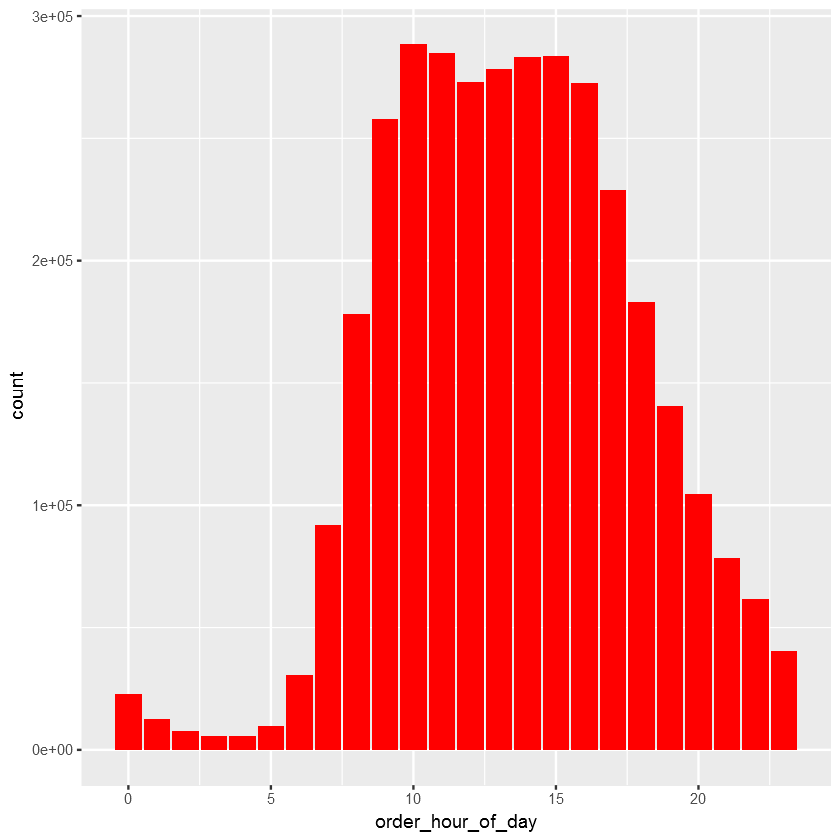

In [15]:

orders %>% 
  ggplot(aes(x=order_hour_of_day)) + 
  geom_histogram(stat="count",fill="red")



#### Day of Week
There is a clear effect of day of the week. Most orders are on days 0 and 1. Unfortunately there is no 
info regarding which values represent which day, but one would assume that this is the weekend.



Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

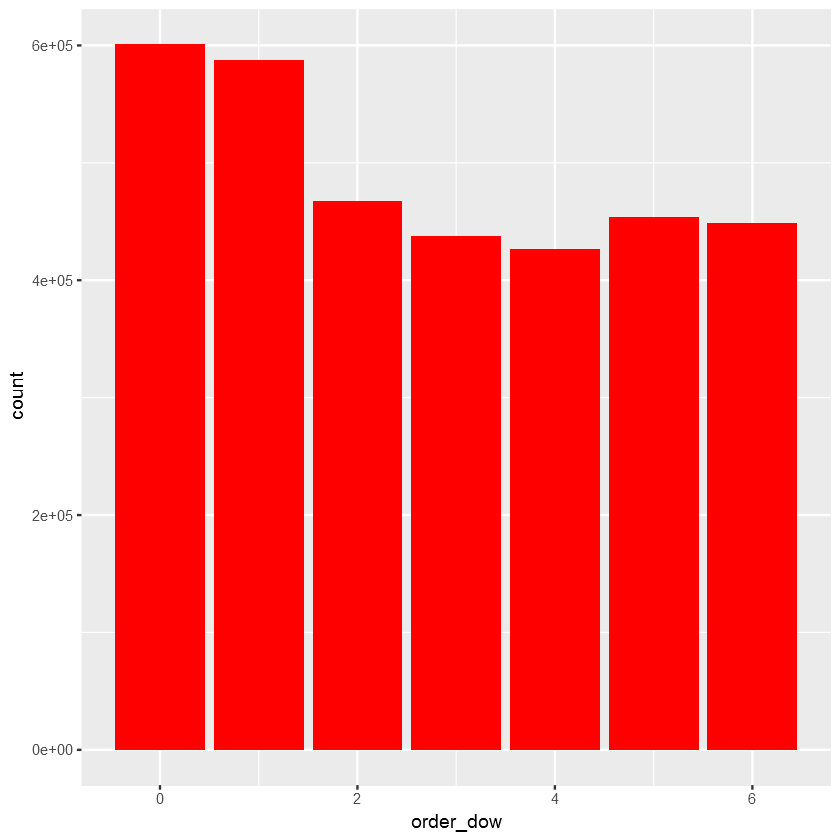

In [16]:
orders %>% 
  ggplot(aes(x=order_dow)) + 
  geom_histogram(stat="count",fill="red")




### When do they order again?
People seem to order more often after exactly 1 week. 


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"Warning message:
"Removed 206209 rows containing non-finite values (stat_count)."

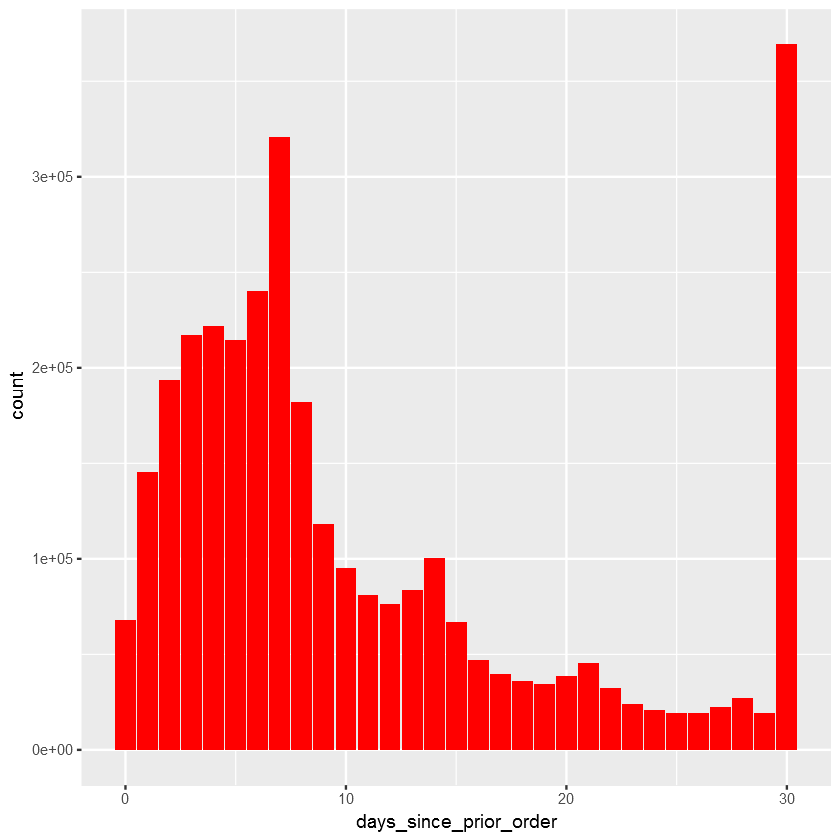

In [17]:

orders %>% 
  ggplot(aes(x=days_since_prior_order)) + 
  geom_histogram(stat="count",fill="red")



### How many prior orders are there?
We can see that there are always at least 3 prior orders. 


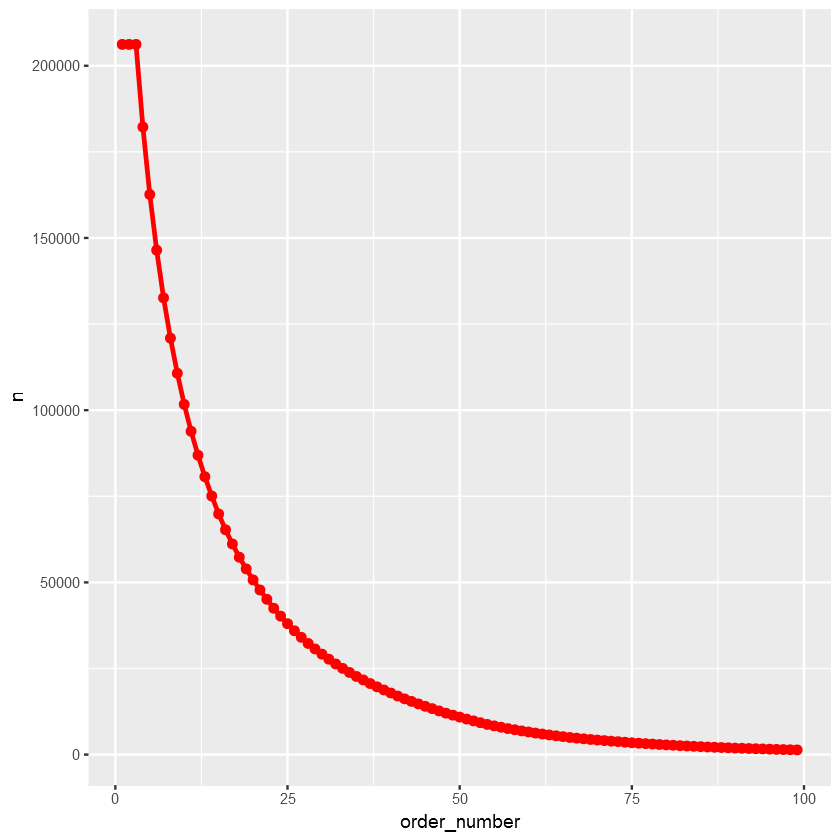

In [19]:

orders %>% filter(eval_set=="prior") %>% count(order_number) %>% ggplot(aes(order_number,n)) + geom_line(color="red", size=1)+geom_point(size=2, color="red")





### How many items do people buy? 
Let's have a look how many items are in the orders. We can see that people most often order around 5 items. The distributions are comparable between the train and prior order set.



#### Train set


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

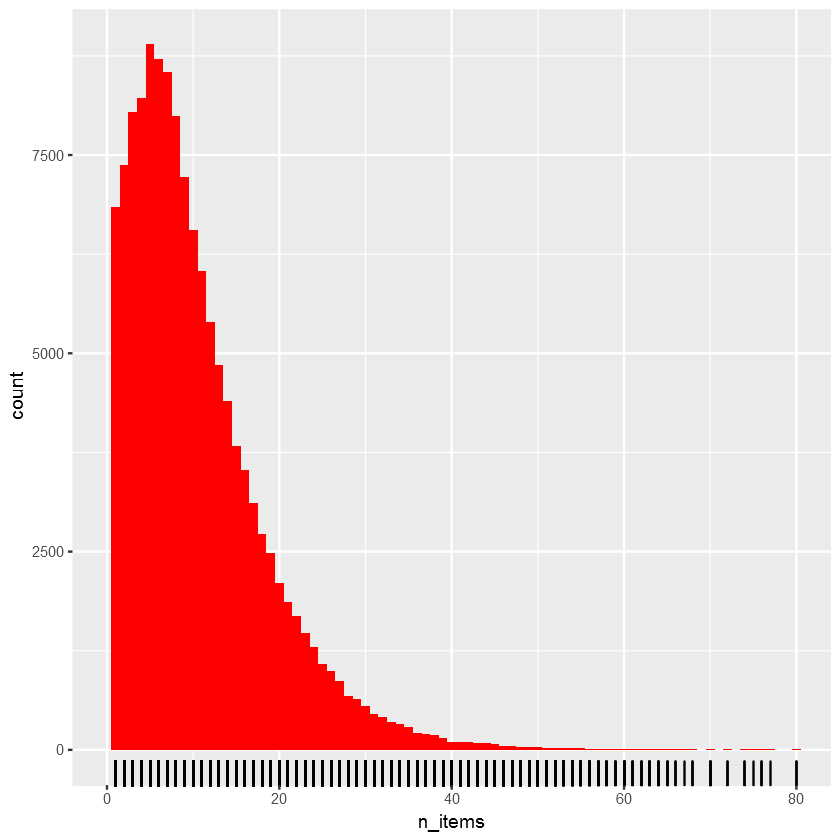

In [22]:

order_products %>% 
  group_by(order_id) %>% 
  summarize(n_items = last(add_to_cart_order)) %>%
  ggplot(aes(x=n_items))+
  geom_histogram(stat="count",fill="red") + 
  geom_rug()+
  coord_cartesian(xlim=c(0,80))


#### Prior orders set



Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

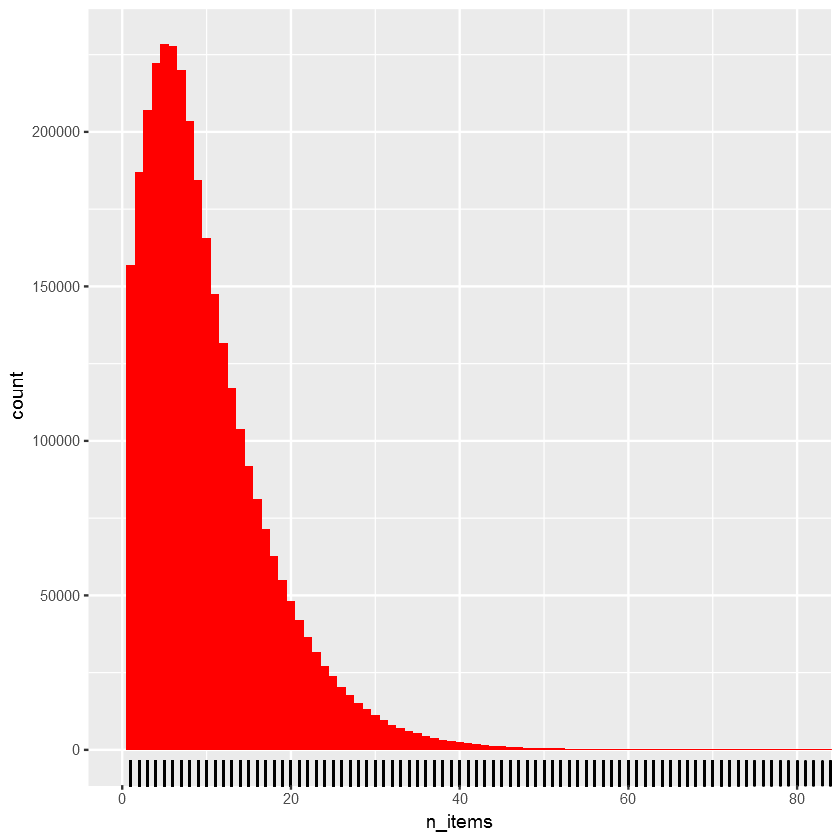

In [23]:

order_products_prior %>% 
  group_by(order_id) %>% 
  summarize(n_items = last(add_to_cart_order)) %>%
  ggplot(aes(x=n_items))+
  geom_histogram(stat="count",fill="red") + 
  geom_rug() + 
  coord_cartesian(xlim=c(0,80))





### Bestsellers
Let's have a look which products are sold most often (top10). And the clear winner is:
**Bananas**



In [24]:

tmp <- order_products %>% 
  group_by(product_id) %>% 
  summarize(count = n()) %>% 
  top_n(10, wt = count) %>%
  left_join(select(products,product_id,product_name),by="product_id") %>%
  arrange(desc(count)) 
kable(tmp)





| product_id| count|product_name           |
|----------:|-----:|:----------------------|
|      24852| 18726|Banana                 |
|      13176| 15480|Bag of Organic Bananas |
|      21137| 10894|Organic Strawberries   |
|      21903|  9784|Organic Baby Spinach   |
|      47626|  8135|Large Lemon            |
|      47766|  7409|Organic Avocado        |
|      47209|  7293|Organic Hass Avocado   |
|      16797|  6494|Strawberries           |
|      26209|  6033|Limes                  |
|      27966|  5546|Organic Raspberries    |

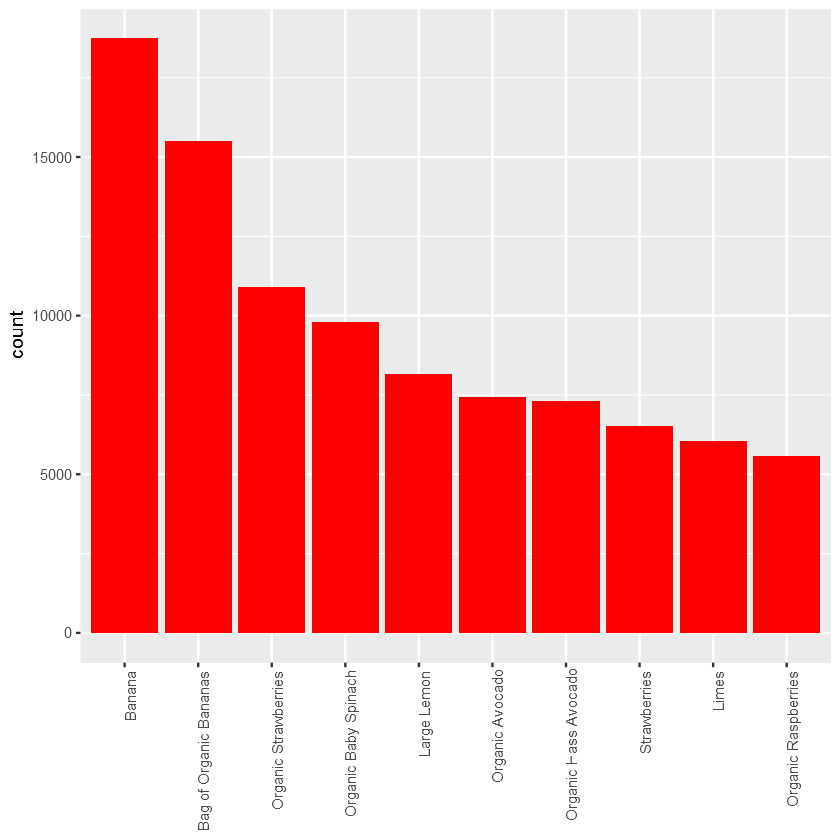

In [25]:
tmp %>% 
  ggplot(aes(x=reorder(product_name,-count), y=count))+
  geom_bar(stat="identity",fill="red")+
  theme(axis.text.x=element_text(angle=90, hjust=1),axis.title.x = element_blank())



### How often do people order the same items again?
59% of the ordered items are reorders.


In [26]:

tmp <- order_products %>% 
  group_by(reordered) %>% 
  summarize(count = n()) %>% 
  mutate(reordered = as.factor(reordered)) %>%
  mutate(proportion = count/sum(count))
kable(tmp)
  




|reordered |  count| proportion|
|:---------|------:|----------:|
|0         | 555793|  0.4014056|
|1         | 828824|  0.5985944|

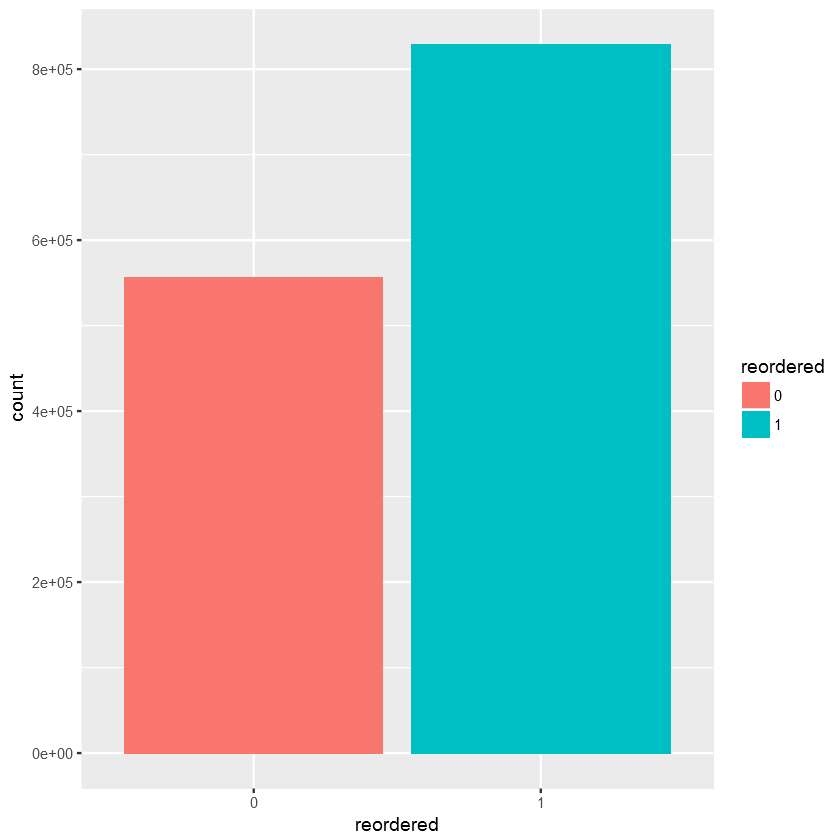

In [27]:
tmp %>% 
  ggplot(aes(x=reordered,y=count,fill=reordered))+
  geom_bar(stat="identity")


### Most often reorder
Now here it becomes really interesting. These 10 products have the highest probability of being reordered.



In [29]:

tmp <-order_products %>% 
  group_by(product_id) %>% 
  summarize(proportion_reordered = mean(reordered), n=n()) %>% 
  filter(n>40) %>% 
  top_n(10,wt=proportion_reordered) %>% 
  arrange(desc(proportion_reordered)) %>% 
  left_join(products,by="product_id")

kable(tmp)





| product_id| proportion_reordered|     n|product_name                          | aisle_id| department_id|
|----------:|--------------------:|-----:|:-------------------------------------|--------:|-------------:|
|       1729|            0.9347826|    92|2% Lactose Free Milk                  |       84|            16|
|      20940|            0.9130435|   368|Organic Low Fat Milk                  |       84|            16|
|      12193|            0.8983051|    59|100% Florida Orange Juice             |       98|             7|
|      21038|            0.8888889|    81|Organic Spelt Tortillas               |      128|             3|
|      31764|            0.8888889|    45|Original Sparkling Seltzer Water Cans |      115|             7|
|      24852|            0.8841717| 18726|Banana                                |       24|             4|
|        117|            0.8833333|   120|Petit Suisse Fruit                    |        2|            16|
|      39180|            0.8819876|

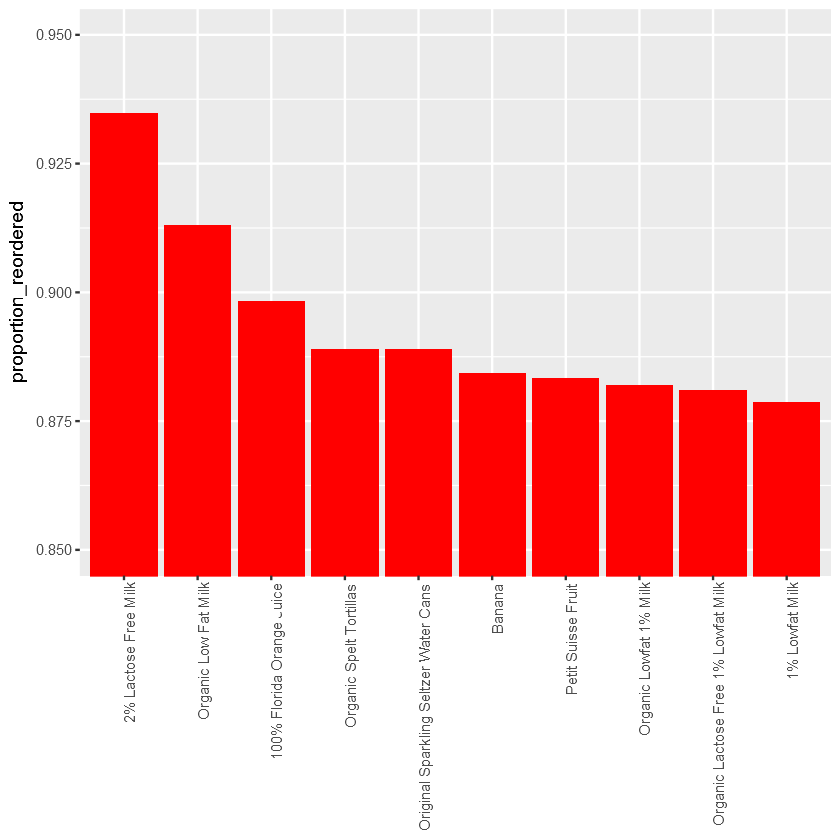

In [30]:
tmp %>% 
  ggplot(aes(x=reorder(product_name,-proportion_reordered), y=proportion_reordered))+
  geom_bar(stat="identity",fill="red")+
  theme(axis.text.x=element_text(angle=90, hjust=1),axis.title.x = element_blank())+coord_cartesian(ylim=c(0.85,0.95))





### Which item do people put into the cart first?
People seem to be quite certain about Multifold Towels and if they buy them, put
them into their cart first in 66% of the time.


In [31]:

tmp <- order_products %>% 
  group_by(product_id, add_to_cart_order) %>% 
  summarize(count = n()) %>% mutate(pct=count/sum(count)) %>% 
  filter(add_to_cart_order == 1, count>10) %>% 
  arrange(desc(pct)) %>% 
  left_join(products,by="product_id") %>% 
  select(product_name, pct, count) %>% 
  ungroup() %>% 
  top_n(10, wt=pct)

kable(tmp)



Adding missing grouping variables: `product_id`




| product_id|product_name                                    |       pct| count|
|----------:|:-----------------------------------------------|---------:|-----:|
|      45004|White Multifold Towels                          | 0.6610169|    39|
|      11885|Sparkling Water, Bottles                        | 0.5942029|    41|
|      13128|Purified Alkalkine Water with Minerals pH10     | 0.5714286|    12|
|       4100|Organic Dark Roast                              | 0.5600000|    14|
|       1729|2% Lactose Free Milk                            | 0.5217391|    48|
|       6729|Cookie Tray                                     | 0.4861111|    35|
|       9285|Boneless Pork Shoulder Butt                     | 0.4814815|    13|
|       6848|Party Tumblers                                  | 0.4615385|    12|
|      12640|Sport Bottle with Flip Cap Natural Spring Water | 0.4615385|    12|
|      26405|XL Pick-A-Size Paper Towel Rolls                | 0.4476190|    47|

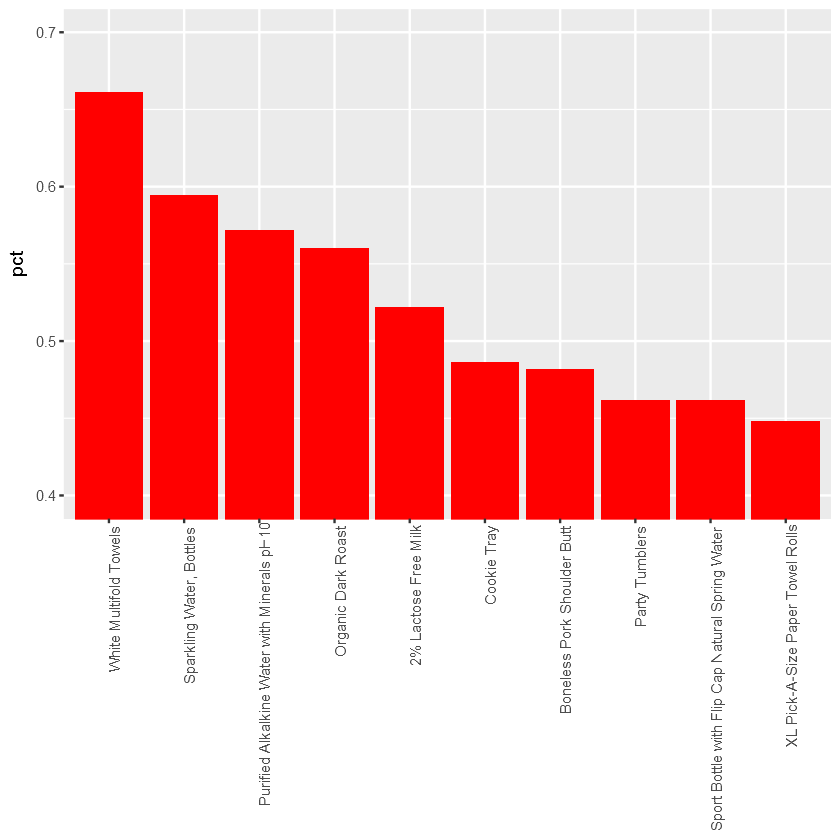

In [32]:
tmp %>% 
  ggplot(aes(x=reorder(product_name,-pct), y=pct))+
  geom_bar(stat="identity",fill="red")+
  theme(axis.text.x=element_text(angle=90, hjust=1),axis.title.x = element_blank())+coord_cartesian(ylim=c(0.4,0.7))





### Association between time of last order and probability of reorder
This is interesting: We can see that if people order again on the same day, they order the same product more often. Whereas when 30 days have passed, they tend to try out new things in their order.



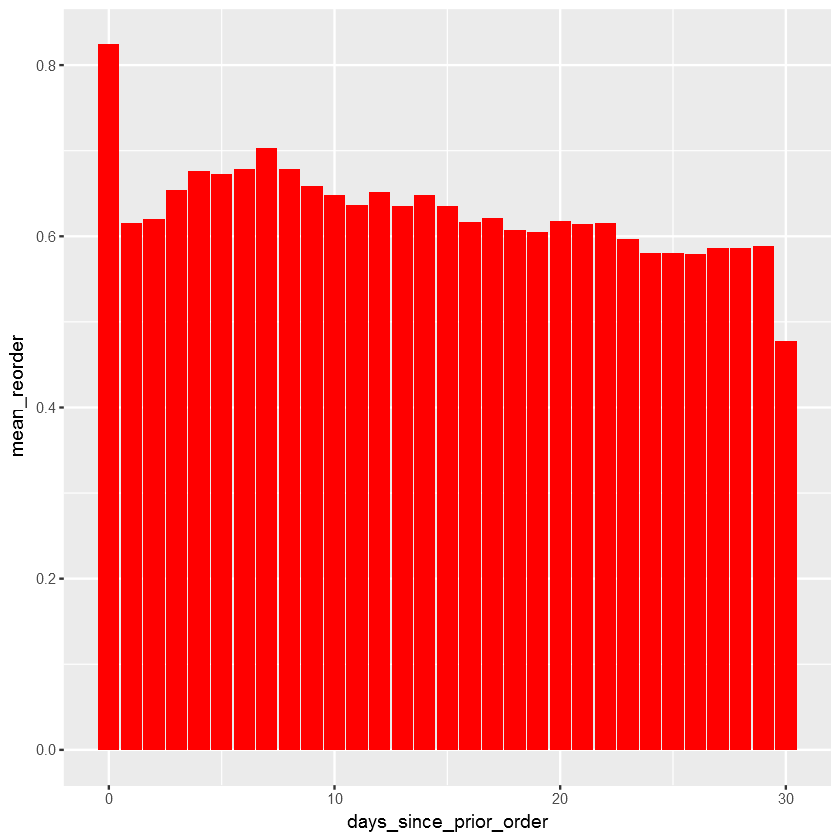

In [33]:

order_products %>% 
  left_join(orders,by="order_id") %>% 
  group_by(days_since_prior_order) %>%
  summarize(mean_reorder = mean(reordered)) %>%
  ggplot(aes(x=days_since_prior_order,y=mean_reorder))+
  geom_bar(stat="identity",fill="red")





### Association between number of orders and probability of reordering
Products with a high number of orders are naturally more likely to be reordered. However, there seems to be a ceiling effect. 




`geom_smooth()` using method = 'gam'


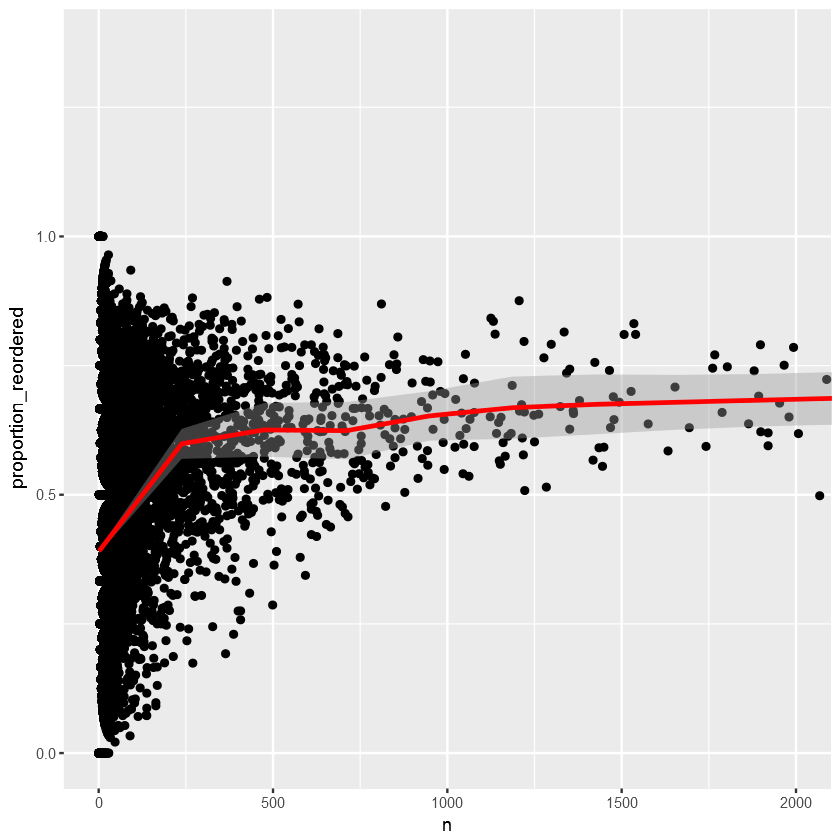

In [35]:

order_products %>% 
  group_by(product_id) %>% 
  summarize(proportion_reordered = mean(reordered), n=n()) %>%
  ggplot(aes(x=n,y=proportion_reordered))+
  geom_point()+
  geom_smooth(color="red")+
  coord_cartesian(xlim=c(0,2000))



### Organic vs Non-organic
What is the percentage of orders that are organic vs. not organic?





|organic     |  count| proportion|
|:-----------|------:|----------:|
|not organic | 979021|  0.7070699|
|organic     | 405596|  0.2929301|

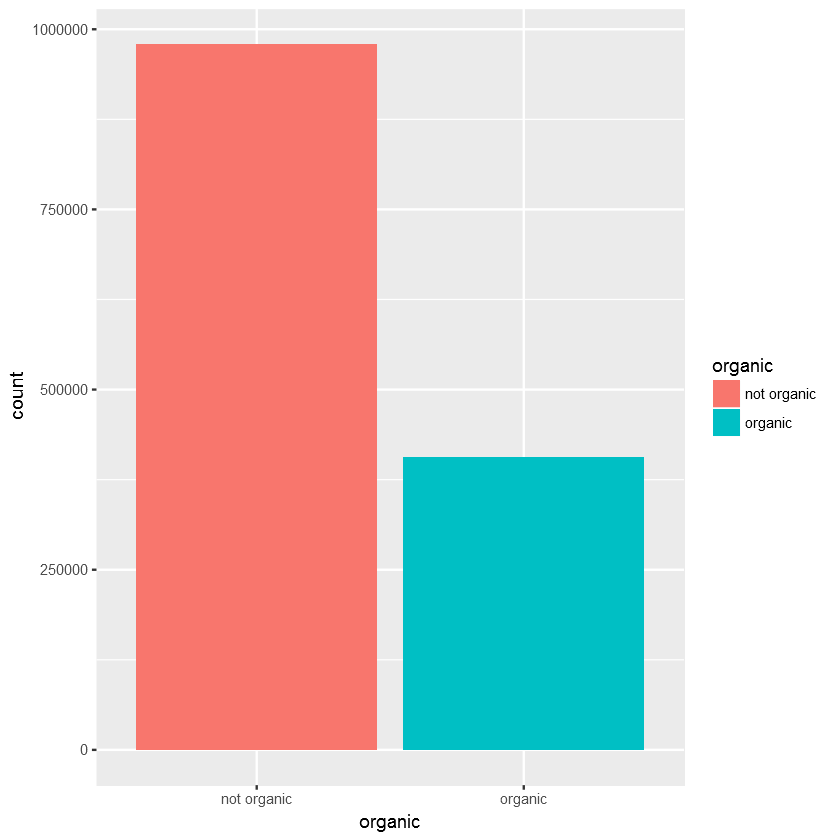

In [36]:
products <- products %>% mutate(organic=ifelse(str_detect(products$product_name,'Organic'),"organic","not organic"), organic= as.factor(organic))

tmp <- order_products %>% 
  left_join(products, by="product_id") %>% 
  group_by(organic) %>% 
  summarize(count = n()) %>% 
  mutate(proportion = count/sum(count))
kable(tmp)

tmp %>% 
  ggplot(aes(x=organic,y=count, fill=organic))+
  geom_bar(stat="identity")



### Reordering Organic vs Non-Organic
what people more often reorder organic products vs non-organic products.




|organic     | mean_reordered|
|:-----------|--------------:|
|not organic |      0.5784963|
|organic     |      0.6471070|

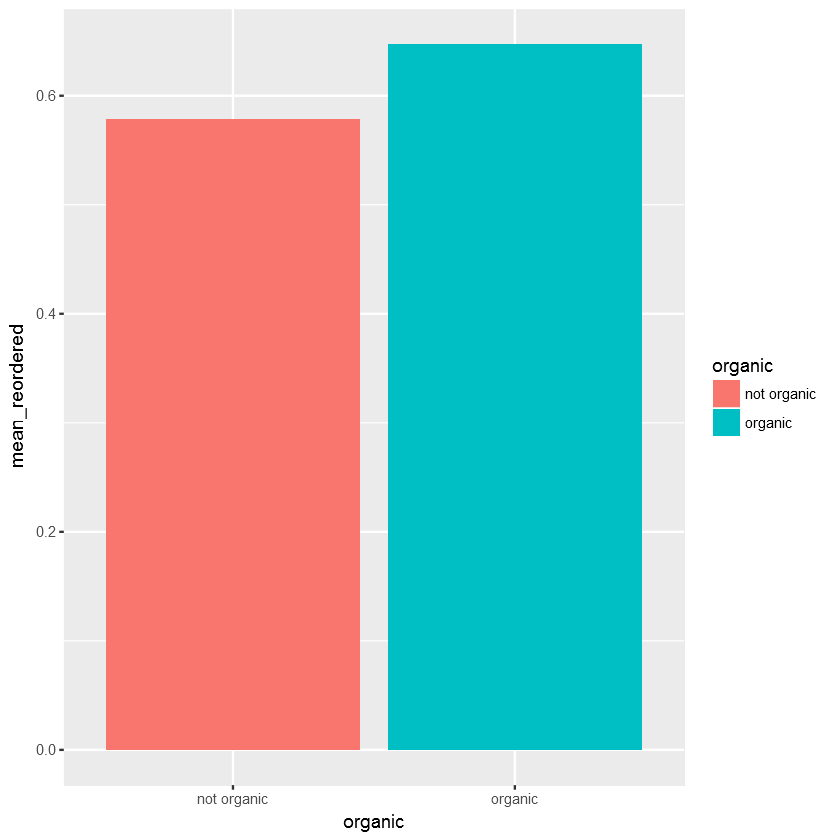

In [37]:

tmp <- order_products %>% left_join(products,by="product_id") %>% group_by(organic) %>% summarize(mean_reordered = mean(reordered))
kable(tmp)

tmp %>% 
  ggplot(aes(x=organic,fill=organic,y=mean_reordered))+geom_bar(stat="identity")





### Visualizing the Product Portfolio
Here is use to treemap package to visualize the structure of instacarts product portfolio. In total there are 21 departments containing 134 aisles. 


#### How are aisles organized within departments?


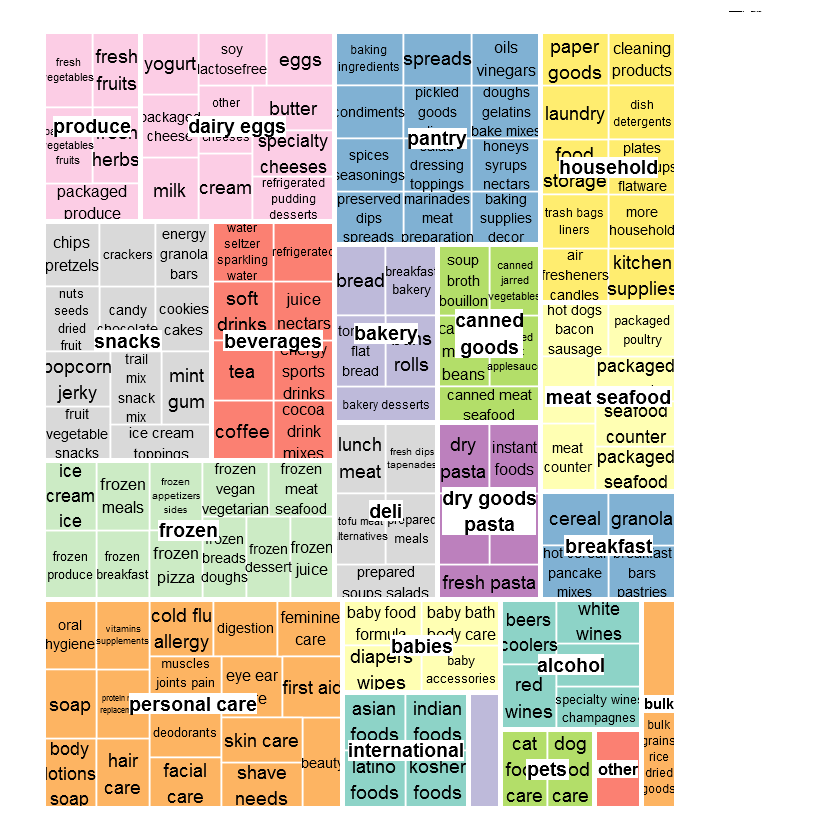

In [39]:

library(treemap)

tmp <- products %>% group_by(department_id, aisle_id) %>% summarize(n=n())
tmp <- tmp %>% left_join(departments,by="department_id")
tmp <- tmp %>% left_join(aisles,by="aisle_id")

tmp2<-order_products %>% 
  group_by(product_id) %>% 
  summarize(count=n()) %>% 
  left_join(products,by="product_id") %>% 
  ungroup() %>% 
  group_by(department_id,aisle_id) %>% 
  summarize(sumcount = sum(count)) %>% 
  left_join(tmp, by = c("department_id", "aisle_id")) %>% 
  mutate(onesize = 1)




treemap(tmp2,index=c("department","aisle"),vSize="onesize",vColor="department",palette="Set3",title="",sortID="-sumcount", border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF")





#### How many unique products are offered in each department/aisle?
The size of the boxes shows the number of products in each category. 




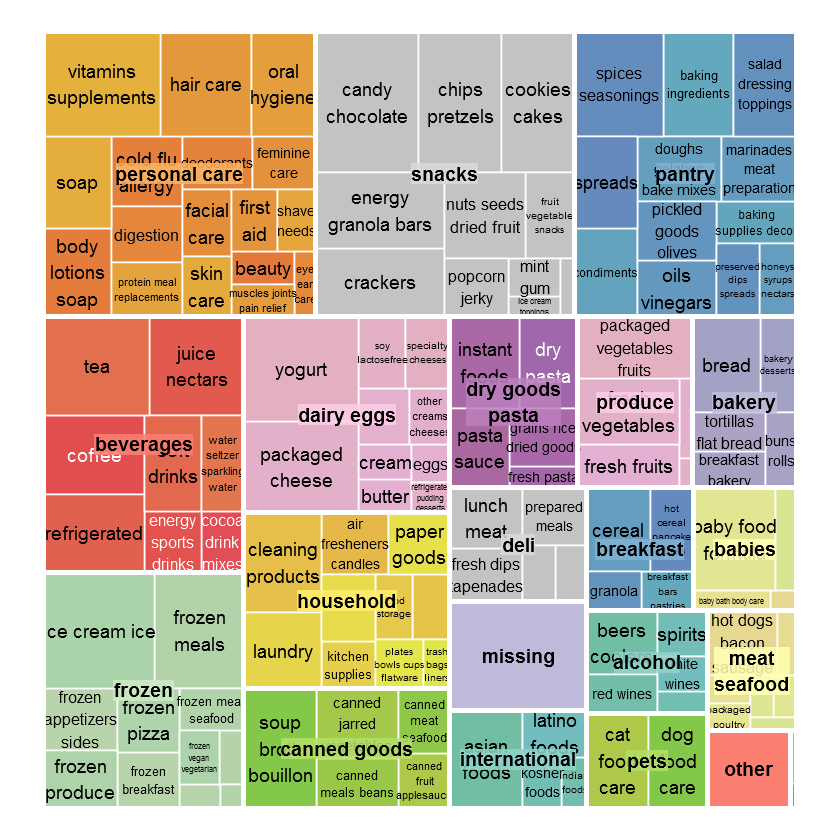

In [41]:
treemap(tmp,index=c("department","aisle"),vSize="n",title="",palette="Set3",border.col="#FFFFFF")



#### How often are products from the department/aisle sold?
The size of the boxes shows the number of sales. 


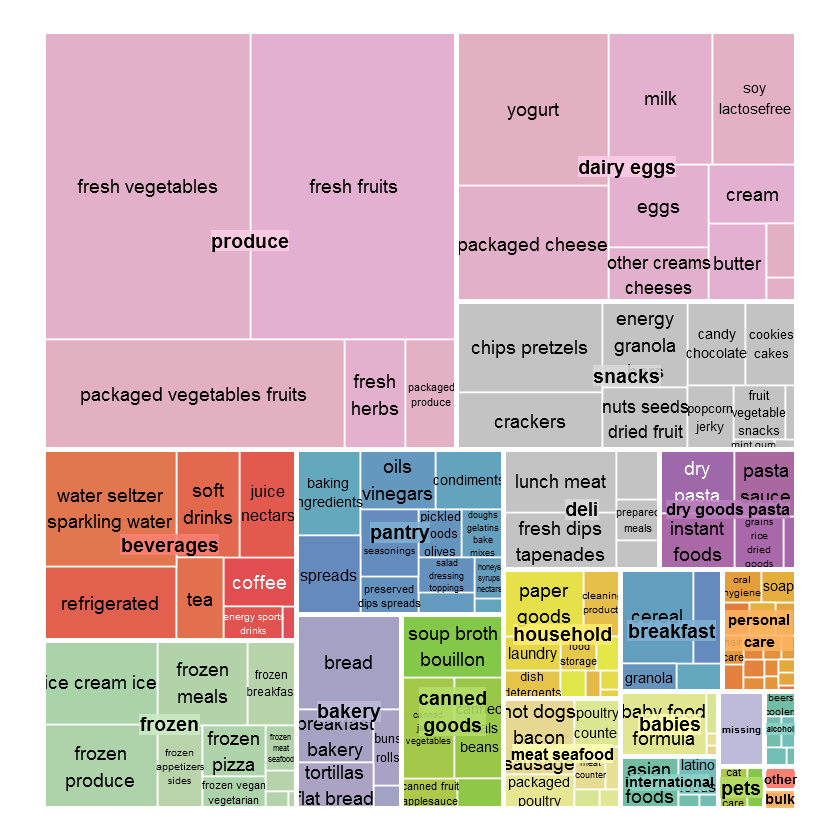

In [42]:

treemap(tmp2,index=c("department","aisle"),vSize="sumcount",title="",palette="Set3",border.col="#FFFFFF")





### Exploring Customer Habits
Here i look for customers who just reorder the same products again all the time. To search those I look at all orders (excluding the first order), where the percentage of reordered items is exactly 1 (This can easily be adapted to look at more lenient thresholds). 
We can see there are in fact **3,487** customers, just always reordering products. 

#### Customers reordering only



In [44]:

tmp <- order_products_prior %>% 
  group_by(order_id) %>% 
  summarize(m = mean(reordered),n=n()) %>% 
  right_join(filter(orders,order_number>2), by="order_id")

tmp2 <- tmp %>% 
  filter(eval_set =="prior") %>% 
  group_by(user_id) %>% 
  summarize(n_equal = sum(m==1,na.rm=T), percent_equal = n_equal/n()) %>% 
  filter(percent_equal == 1) %>% 
  arrange(desc(n_equal))

datatable(tmp2, class="table-condensed", style="bootstrap", options = list(dom = 'tp'))




HTML widgets cannot be represented in plain text (need html)

#### The customer with the strongest habit
The coolest customer is id #99753, having 97 orders with only reordered items. That's what I call a strong habit. 
She/he seems to like Organic Milk :-)



In [46]:
uniqueorders <- filter(tmp, user_id == 99753)$order_id
tmp <- order_products_prior %>% 
  filter(order_id %in% uniqueorders) %>% 
  left_join(products, by="product_id")

datatable(select(tmp,-aisle_id,-department_id,-organic), style="bootstrap", class="table-condensed", options = list(dom = 'tp'))


Warning message in instance$preRenderHook(instance):
"It seems your data is too big for client-side DataTables. You may consider server-side processing: http://rstudio.github.io/DT/server.html"

HTML widgets cannot be represented in plain text (need html)


Let's look at his order in the train set. One would assume that he would buy "Organic Whole Milk" and "Organic Reduced Fat Milk":



In [47]:
tmp <- orders %>% filter(user_id==99753, eval_set == "train")
tmp2 <- order_products %>%  
  filter(order_id == tmp$order_id) %>% 
  left_join(products, by="product_id")



In [48]:
datatable(select(tmp2,-aisle_id,-department_id,-organic), style="bootstrap", class="table-condensed", options = list(dom = 't'))



Warning message in instance$preRenderHook(instance):
"It seems your data is too big for client-side DataTables. You may consider server-side processing: http://rstudio.github.io/DT/server.html"

HTML widgets cannot be represented in plain text (need html)